<a href="https://www.kaggle.com/denizcanoguz/a-b-test-case-study?scriptVersionId=88485146" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# A/B Test Case Study
---
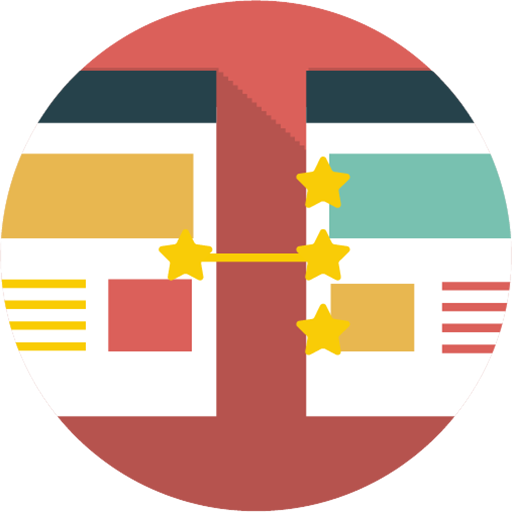

## What is A/B Test?
---
A/B Test is trying to choose the right strategy by experimenting with the clarity of a scientific experiment. It is a form of test that analyzes whether there is a statistical difference between two different groups.

* Business world has always been searching for simplier, faster and cheaper solutions for specific problems. Many methods has been tried to get the best output. One of them is A/B Test, which for decades is being used by companies to solve the "scientific difference" problems.
 
* A/B Test is a user experience research methodology. With this, we can compare statistically the meaning of using or not the new approach of our business; the impact of the new design of our website; the difference of outcome of our employeer and many more.

A/B Test includes application of statistical hypothesis testing or better said "two-sample hypothesis testing". That means A/B Test is used to compare the difference between two samples considering two assumptions.

First assumption of parametric A/B Test is Normal distribution (Normality test) and the second is Homogeneity of variances (homoscedasticity).

* Normality test - Calculates if dataset is well-modeled by a normal distribution. 
* Homogeneity of variances - Means that if all of it's random variables have the same finite variance.

 in the continuation..

* Independent two-sample t-test (parametric test) if assumptions are met
* Mannwhitneyu test if assumptions are not satisfied (non-parametric test)


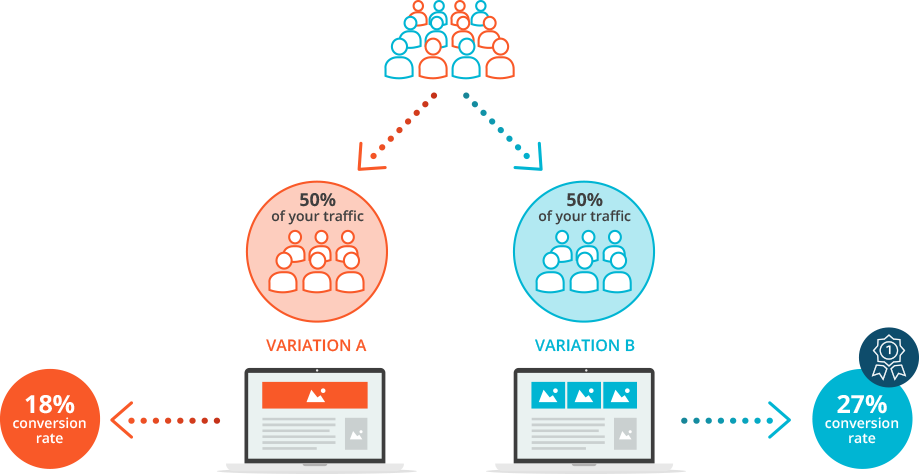

### We Have Business Problem: 
---
A company recently made it available new type of bidding named "Average bidding" to replace the previous one named "Maximum bidding" for advertisement bids.

One of our customers, decided to test this new feature. Is the new "Average bidding" bringing more sales than the "Maximum bidding"?

### Dataset Story:
---
Users in the datasets is using our customers products. Change on advertisement bidding type is thought to have a different effect on sales, adv clicks, etc.

There are two separate data sets:

Control Group - The dataset formed by using "Maximum bidding"

Test Group - The dataset frmed by using "Average bidding"

### Variables: 
---
Impressions, Click, Purchasing, Earnings.

# Let's go to practice
---
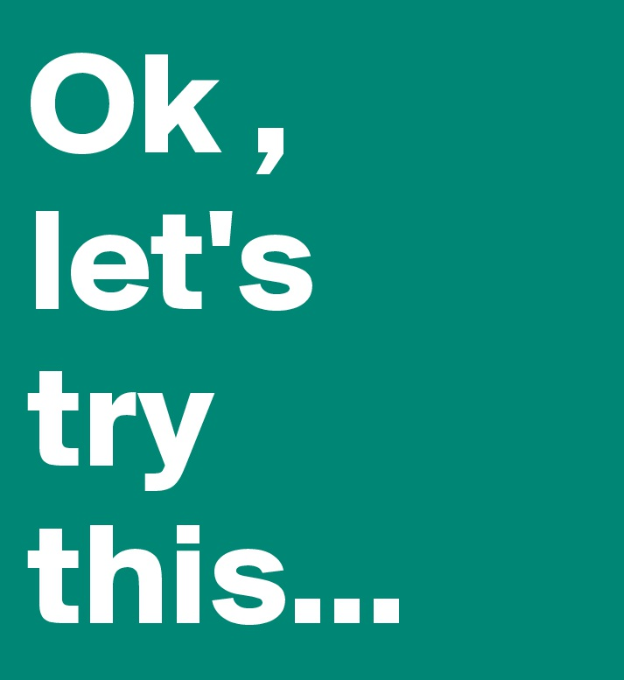

### NECESSARY IMPORT

In [1]:
!pip install openpyxl
import pandas as pd
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, \
    f_oneway, kruskal

     |████████████████████████████████| 242 kB 537 kB/s            


### LET'S BRING OUR DATA

In [2]:
control_df_ = pd.read_excel("../input/ab-test-sample/ab_testing.xlsx",sheet_name="Control Group")
control_df = control_df_.copy()
test_df_ = pd.read_excel("../input/ab-test-sample/ab_testing.xlsx",sheet_name="Test Group")
test_df = test_df_.copy()

In [3]:
control_df.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [4]:
test_df.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


# LET'S APPLY E.D.A ;
 ---

In [5]:
control_df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,101711.4,20302.2,45475.9,85726.7,99790.7,115212.8,147539.3
Click,40.0,5100.7,1330.0,2189.8,4124.3,5001.2,5923.8,7959.1
Purchase,40.0,550.9,134.1,267.0,470.1,531.2,638.0,801.8
Earning,40.0,1908.6,302.9,1254.0,1685.8,1975.2,2119.8,2497.3


In [6]:
# WITHIN 40 DAYS; 
# TOTAL NUMBER OF VIEWS: 4.068.458.0
control_df["Impression"].sum().round(1)

4068458.0

In [7]:
# TOTAL CLICKS: 204,026.3
control_df["Click"].sum().round(1)

204026.3

In [8]:
# TOTAL NUMBER OF PURCHASES: 22.035.8
control_df["Purchase"].sum().round(1)

22035.8

In [9]:
# TOTAL GAIN: 76,342.7
control_df["Earning"].sum().round(1)

76342.7

### THE ABOVE INFORMATION IS THE INFORMATION OF THE DATA IN THE PROCESS OF MAX BIDDING APPLICATION.

In [10]:
test_df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,120512.4,18807.4,79033.8,112692.0,119291.3,132050.6,158605.9
Click,40.0,3967.5,923.1,1836.6,3376.8,3931.4,4660.5,6019.7
Purchase,40.0,582.1,161.2,311.6,444.6,551.4,699.9,889.9
Earning,40.0,2514.9,282.7,1939.6,2280.5,2544.7,2761.5,3171.5


In [11]:
# WITHIN 40 DAYS; 
# TOTAL NUMBER OF VIEWS: 4.820.496.5
test_df["Impression"].sum().round(1)

4820496.5

In [12]:
# TOTAL CLICKS: 158.702.0
test_df["Click"].sum().round(1)

158702.0

In [13]:
# TOTAL NUMBER OF PURCHASES: 23.284.2
test_df["Purchase"].sum().round(1)

23284.2

In [14]:
# TOTAL GAIN: 100.595.6
test_df["Earning"].sum().round(1)

100595.6

### THE ABOVE INFORMATION IS THE INFORMATION OF THE DATA IN THE PROCESS OF AVERAGE BIDDING APPLICATION.

### I DECIDE TO DEFINE A/B TEST ON AVERAGE PURCHASE "Purchase" ACCORDING TO THE ANALYSIS MADE.

# Task 1 :
Define the hypothesis of the A/B test. 

---

H0: M1=M2  ---> THERE IS NO SIGNIFICANT DIFFERENCE BETWEEN MAX BIDDING AND AVERAGE BIDDING AVERAGE REVENUES.

H1: M1!=M2 ---> THERE IS A SIGNIFICANT DIFFERENCE BETWEEN MAX BIDDING AND AVERAGE BIDDING AVERAGE REVENUES.

WE DEFINED OUR HYPOTHESES ABOVE.

####  LET'S DO OUR ASSUMPTION CHECKS FIRST.
---

Normality Assumption 
Variance Homogeneity 

#### FIRST ASSUMPTION OF NORMALITY:
---
H0: The assumption of normal distribution is provided.

H1: The assumption of normal distribution is not provided.


In [15]:
test_stat, pvalue = shapiro(control_df["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# OUR P VALUE VALUE IS GREATER THAN ALPHA H0 cannot be rejected. THE ASSUMPTION OF NORMALITY IS PROVIDED.

Test Stat = 0.9773, p-value = 0.5891


In [16]:
test_stat, pvalue = shapiro(test_df["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
#  OUR P VALUE VALUE IS GREATER THAN ALPHA H0 cannot be rejected. THE ASSUMPTION OF NORMALITY IS PROVIDED.

Test Stat = 0.9589, p-value = 0.1541


### ASSUMPTIONS OF NORMALITY WERE MAINTAINED IN TWO GROUPS. NOW LET'S GO TO THE ASSUMPTIONS OF HOMOGENCY.

ASSUMPTION OF VARIANCE HOMOGENEOUS:

---

H0: Variances are Homogeneous

H1: Variances Are Not Homogeneous


In [17]:
test_stat, pvalue = levene(control_df["Purchase"],test_df["Purchase"])
print('Test Stats = %.4f, p-value = %.4f' % (test_stat, pvalue))
#  OUR P VALUE VALUE IS GREATER THAN ALPHA H0 cannot be rejected. THE HOMOGENCY ASSUMPTION IS PROVIDED.

Test Stats = 2.6393, p-value = 0.1083


## WE'RE GOING TO APPLY NOW.
---
Since both assumptions are met, we will apply an independent two-sample t-test (parametric test).

In [18]:
test_stat, pvalue = ttest_ind(control_df["Purchase"],test_df["Purchase"],equal_var=True) # if equal_var = false , it performs the welct test
print('Test Stats = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stats = -0.9416, p-value = 0.3493


H0: M1=M2  ---> THERE IS NO SIGNIFICANT DIFFERENCE BETWEEN MAX BIDDING AND AVERAGE BIDDING AVERAGE REVENUES.

H1: M1!=M2 ---> THERE IS A SIGNIFICANT DIFFERENCE BETWEEN MAX BIDDING AND AVERAGE BIDDING AVERAGE REVENUES.

OUR P VALUE VALUE IS GREATER THAN ALPHA H0 cannot be rejected.

# Task 2:
Statistically the test results Comment whether it is significant or not.

---
H0: M1=M2  ---> HERE IS NO SIGNIFICANT DIFFERENCE BETWEEN MAX BIDDING AND AVERAGE BIDDING AVERAGE REVENUES.

H1: M1!=M2 ---> THERE IS A SIGNIFICANT DIFFERENCE BETWEEN MAX BIDDING AND AVERAGE BIDDING AVERAGE REVENUES.

Test Stats = -0.9416, p-value = 0.3493

H0: M1=M2 HYPOTHESIS CANNOT BE REJECTED, BECAUSE P VALUE (0.3493) VALUE IS (0.05) GREATER THAN ALPHA.

THERE IS NO STATISTICALLY POSITIVE DIFFERENCE BETWEEN MAX BIDDING AND AVERAGE BIDDING AVERAGE REVENUES.


# Task 3:
Which tests did you use? State your reasons.

---

We have done our Assumption Checks and the Normality assumption and the Homogeneity Assumption are provided.

Since our assumptions were met, we performed an independent two-sample t-test (parametric test).


# Task 4:
Based on your answer in Task 2, what is your advice to the client?

---

WHAT TO DO IF THERE IS NO SIGNIFICANT DIFFERENCE BETWEEN MAX BIDDING AND AVERAGE BIDDING AVERAGE REVENUES;

WAS THE TEST TAKEN IN A PERIOD OVER OR NOT OVERLAPING WITH THE SEASONAL PATTERNS? 
* If the answer is in an overlapping period, no action is required. 
* If the answer is in a non-overlapping period, it may be necessary to repeat these test stages in the appropriate period for a healthy analysis.

WHAT IS THE NUMBER OF WEEKDAYS AND WEEKENDS INSIDE IT? 
* If the answer is in an even number of periods, no action is required. 
* If the answer is not in an equal number of periods, it may be necessary to repeat these test stages in the appropriate period for a healthy analysis.

ARE THE GRAPHS REVIEWED? 
* A PATTERN MAY HAVE BEEN CAUGHT ON THE GRAPHICS FOR THE NEW SITUATION IN THE LAST DAYS, IT MAY BE RECOMMENDED TO EXTEND THE TEST TIME IF THE CURVE IS EXAMINED AND SUCH A PATTERN IS Caught.


---

Thank you to those who contributed to this work. 
* [Veri Bilimi OKulu](https://www.veribilimiokulu.com/)